In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3

In [19]:
bom = pd.read_csv('../data/bom.movie_gross.csv.gz')
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [35]:
bom['year'].value_counts().sort_index()

year
2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: count, dtype: int64

# Rotten Tomatoes Data

In [20]:
rt_info = pd.read_csv('../data/rt.movie_info.tsv.gz', sep='\t')

# Converting the release dates to datetime objects
rt_info['theater_date'] = pd.to_datetime(rt_info['theater_date'])
rt_info['dvd_date'] = pd.to_datetime(rt_info['dvd_date'])

# creating a release_month column
rt_info['release_month'] = pd.to_datetime(rt_info['theater_date']).dt.month_name()

rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1560 non-null   int64         
 1   synopsis       1498 non-null   object        
 2   rating         1557 non-null   object        
 3   genre          1552 non-null   object        
 4   director       1361 non-null   object        
 5   writer         1111 non-null   object        
 6   theater_date   1201 non-null   datetime64[ns]
 7   dvd_date       1201 non-null   datetime64[ns]
 8   currency       340 non-null    object        
 9   box_office     340 non-null    object        
 10  runtime        1530 non-null   object        
 11  studio         494 non-null    object        
 12  release_month  1201 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 158.6+ KB


In [21]:
rt_reviews = pd.read_csv('../data/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [22]:
# Combing the rt sheets into one df

rt_combined = pd.merge(rt_info, rt_reviews, on='id')
rt_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             54432 non-null  int64         
 1   synopsis       54300 non-null  object        
 2   rating_x       54346 non-null  object        
 3   genre          54345 non-null  object        
 4   director       48992 non-null  object        
 5   writer         45206 non-null  object        
 6   theater_date   53206 non-null  datetime64[ns]
 7   dvd_date       53206 non-null  datetime64[ns]
 8   currency       33310 non-null  object        
 9   box_office     33310 non-null  object        
 10  runtime        53594 non-null  object        
 11  studio         40125 non-null  object        
 12  release_month  53206 non-null  object        
 13  review         48869 non-null  object        
 14  rating_y       40915 non-null  object        
 15  fresh          5443

# TMDB Data

In [23]:
tmdb_movies = pd.read_csv('../data/tmdb.movies.csv.gz')
tmdb_movies.rename(columns={'title': 'primary_title'}, inplace=True)
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   primary_title      26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# The Numbers Data

In [24]:
tn_movie_budgets = pd.read_csv('../data/tn.movie_budgets.csv.gz')
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [38]:
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['release_month'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.month_name()
tn_movie_budgets['release_year'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.year
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   release_month      5782 non-null   object        
 7   release_year       5782 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 338.9+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'December'),
  Text(1, 0, 'May'),
  Text(2, 0, 'June'),
  Text(3, 0, 'April'),
  Text(4, 0, 'November'),
  Text(5, 0, 'July'),
  Text(6, 0, 'March'),
  Text(7, 0, 'February'),
  Text(8, 0, 'October'),
  Text(9, 0, 'August'),
  Text(10, 0, 'September'),
  Text(11, 0, 'January')])

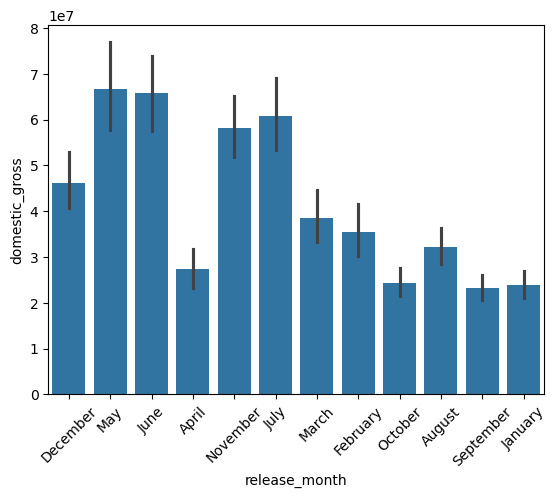

In [60]:
#tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '')
#tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '')
tn_movie_budgets.groupby('release_month')['domestic_gross'].mean()
sns.barplot(x='release_month', y='domestic_gross', data=tn_movie_budgets)
plt.xticks(rotation=45)



In [54]:
tn_movie_budgets.groupby('release_month')['domestic_gross']

# IMDB Data

In [25]:
conn = sqlite3.connect('../data/im.db')
pd.read_sql('SELECT name AS "Table Names" FROM sqlite_master WHERE type="table"', conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [26]:
# Making the IMDB movie_basics table into a pandas df
imdb_movie_basics = pd.read_sql('SELECT * FROM movie_basics', conn)
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [27]:
# Making the IMDB directors table into a pandas df
imdb_directors = pd.read_sql('SELECT * FROM directors', conn)
imdb_directors.value_counts()
# May want to merge these with the movie and persons tables before converting

movie_id   person_id
tt2249786  nm3911770    52
           nm1286055    52
           nm2853432    52
           nm2747918    52
           nm2583932    52
                        ..
tt1997402  nm0950841     1
tt1997405  nm1016009     1
tt1997417  nm0133980     1
tt1997429  nm4554137     1
tt4105968  nm1297226     1
Name: count, Length: 163535, dtype: int64

In [28]:
imdb_persons = pd.read_sql('SELECT * FROM persons', conn)
imdb_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [29]:
# Taking a look at actors and actresses

pd.read_sql("""
SELECT primary_name, COUNT(primary_name) AS num_movies 
FROM principals 
JOIN persons
USING(person_id)
WHERE (category = 'actor' OR category = 'actress') AND characters IS NOT NULL 
GROUP BY person_id
HAVING num_movies > 10
ORDER BY num_movies DESC     
            """, conn) 

,primary_name,num_movies
0,Eric Roberts,143
1,Brahmanandam,69
2,Tom Sizemore,69
3,Seiji Nakamitsu,67
4,Michael Madsen,63
...,...,...
1856,Denzel Washington,11
1857,John Travolta,11
1858,Will Smith,11
1859,Parker Posey,11


# Combining different DataFrames

In [30]:
# Combing the IMDB 'movie_basics' table with the TMDB 'tmdb_movies' table

merged_movie_basics = pd.merge(imdb_movie_basics, tmdb_movies, on='primary_title')
merged_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23612 entries, 0 to 23611
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           23612 non-null  object 
 1   primary_title      23612 non-null  object 
 2   original_title_x   23607 non-null  object 
 3   start_year         23612 non-null  int64  
 4   runtime_minutes    21750 non-null  float64
 5   genres             23263 non-null  object 
 6   Unnamed: 0         23612 non-null  int64  
 7   genre_ids          23612 non-null  object 
 8   id                 23612 non-null  int64  
 9   original_language  23612 non-null  object 
 10  original_title_y   23612 non-null  object 
 11  popularity         23612 non-null  float64
 12  release_date       23612 non-null  object 
 13  vote_average       23612 non-null  float64
 14  vote_count         23612 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 2.7+ MB


In [31]:
# Trying to add the bom table to the merged_movie_basics table

# Making the "title" column match "primary title"
bom.rename(columns={'title': 'primary_title'}, inplace=True)

merged_movie_basics = pd.merge(merged_movie_basics, bom, on='primary_title')
merged_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3772 non-null   object 
 1   primary_title      3772 non-null   object 
 2   original_title_x   3772 non-null   object 
 3   start_year         3772 non-null   int64  
 4   runtime_minutes    3545 non-null   float64
 5   genres             3715 non-null   object 
 6   Unnamed: 0         3772 non-null   int64  
 7   genre_ids          3772 non-null   object 
 8   id                 3772 non-null   int64  
 9   original_language  3772 non-null   object 
 10  original_title_y   3772 non-null   object 
 11  popularity         3772 non-null   float64
 12  release_date       3772 non-null   object 
 13  vote_average       3772 non-null   float64
 14  vote_count         3772 non-null   int64  
 15  studio             3772 non-null   object 
 16  domestic_gross     3738 

<Axes: xlabel='year', ylabel='domestic_gross'>

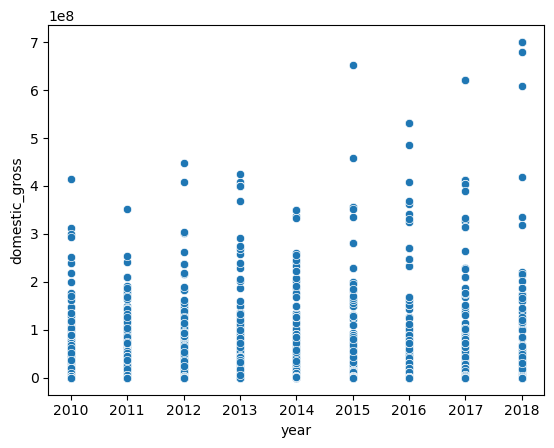

In [34]:
sns.scatterplot(data=merged_movie_basics, x='year', y='domestic_gross')